In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

11501568/11490434 [==============================] - 0s 0us/step

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [3]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [5]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28)))  

model.add(Dense(100, activation='relu'))     

model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, callbacks=[reduceLR])

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3023 - accuracy: 0.9147 - val_loss: 0.1654 - val_accuracy: 0.9513 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1399 - accuracy: 0.9591 - val_loss: 0.1164 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0958 - accuracy: 0.9710 - val_loss: 0.1044 - val_accuracy: 0.9685 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.1036 - val_accuracy: 0.9698 - lr: 0.0010
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0970 - val_accuracy: 0.9708 - lr: 0.0010
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0885 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 7/30
1500/1500 [==============================] - 4s

In [8]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9801


[0.07833239436149597, 0.9800999760627747]

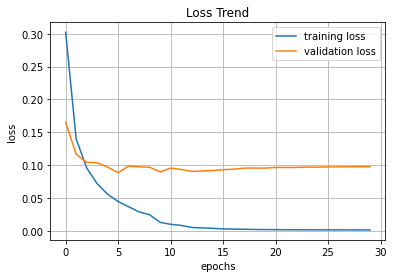

In [9]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

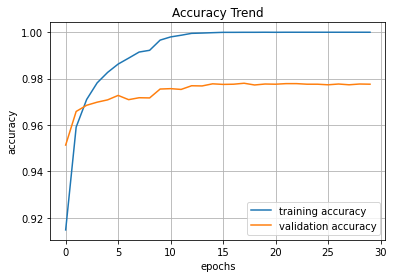

In [10]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

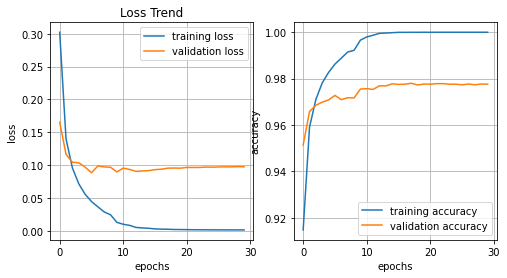

In [11]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()